In [1]:
library(CellChat)
library(tidyverse)
library(ggalluvial)
library(Seurat)
library(data.table)
library(ggsci)
library(NMF)

载入需要的程辑包：dplyr


载入程辑包：‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


载入需要的程辑包：igraph


载入程辑包：‘igraph’


The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union


载入需要的程辑包：ggplot2

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
✔ readr     2.1.5     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ lubridate::%--%()        masks igraph::%--%()
✖ tibble::as_data_frame()  masks igraph::as_data_frame(), dplyr::as_data_frame()
✖ Biobase::combine()       masks BiocGenerics::combine(), dplyr::combin

In [2]:
all <- readRDS('./mus_muscle_sr_obj_cca.rds')
all[["RNA"]] <- as(all[["RNA"]], "Assay")

In [7]:
Idents(all) <- 'case_control'
FLOX <- subset(all, idents = 'FLOX')
KO <- subset(all, idents = 'KO')

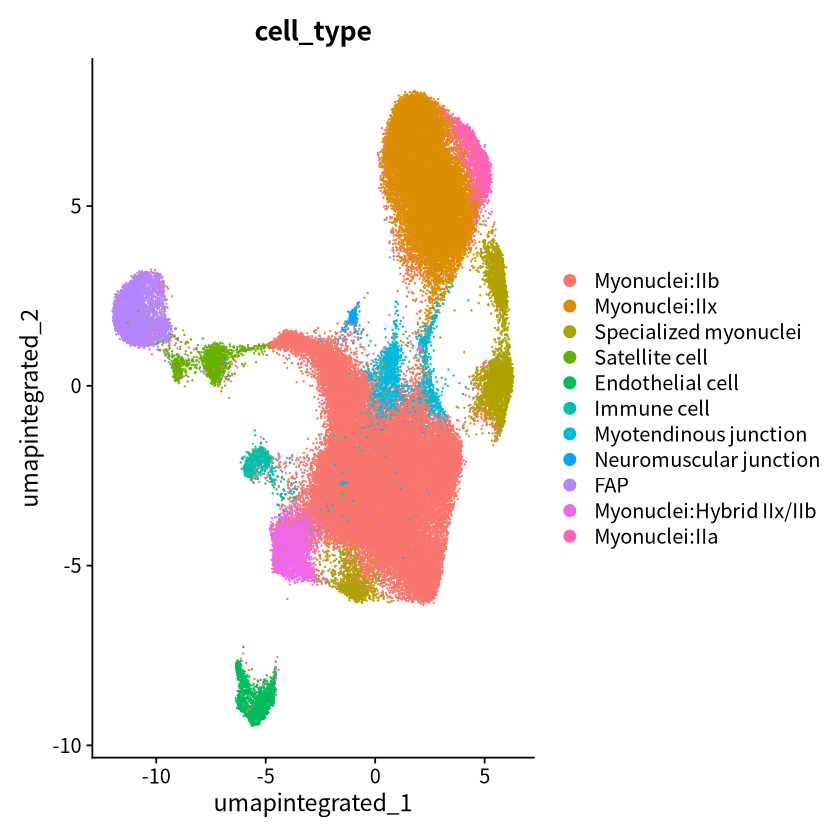

In [12]:
DimPlot(all,reduction = 'umap.integrated',group.by = 'cell_type')

In [13]:
FLOX <- createCellChat(FLOX@assays$RNA@data, meta = FLOX@meta.data, group.by = "cell_type")
KO <- createCellChat(KO@assays$RNA@data, meta = KO@meta.data, group.by = "cell_type")

[1] "Create a CellChat object from a data matrix"


Warning message in createCellChat(FLOX@assays$RNA@data, meta = FLOX@meta.data, group.by = "cell_type"):
“The 'meta' data does not have a column named `samples`. We now add this column and all cells are assumed to belong to `sample1`! 
”


Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  Myonuclei:IIb, Myonuclei:IIx, Specialized myonuclei, Satellite cell, Endothelial cell, Immune cell, Myotendinous junction, Neuromuscular junction, FAP, Myonuclei:Hybrid IIx/IIb, Myonuclei:IIa 
[1] "Create a CellChat object from a data matrix"


Warning message in createCellChat(KO@assays$RNA@data, meta = KO@meta.data, group.by = "cell_type"):
“The 'meta' data does not have a column named `samples`. We now add this column and all cells are assumed to belong to `sample1`! 
”


Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  Myonuclei:IIb, Myonuclei:IIx, Specialized myonuclei, Satellite cell, Endothelial cell, Immune cell, Myotendinous junction, Neuromuscular junction, FAP, Myonuclei:Hybrid IIx/IIb, Myonuclei:IIa 


In [ ]:
# future::plan("multisession", workers = 20)
cellchat <- FLOX
cellchat@DB <- CellChatDB.mouse
cellchat <- subsetData(cellchat)
cellchat <- identifyOverExpressedGenes(cellchat)
cellchat <- identifyOverExpressedInteractions(cellchat)
# cellchat <- projectData(cellchat, PPI.mouse)
cellchat <- computeCommunProb(cellchat, raw.use = TRUE, population.size = TRUE, type = "truncatedMean",trim = 0.05)
cellchat <- filterCommunication(cellchat, min.cells = 3)
cellchat <- computeCommunProbPathway(cellchat)
cellchat <- aggregateNet(cellchat)
cellchat <- netAnalysis_computeCentrality(cellchat, slot.name = "netP")
FLOX <- cellchat
### 
cellchat <- KO
cellchat@DB <- CellChatDB.mouse
cellchat <- subsetData(cellchat)
cellchat <- identifyOverExpressedGenes(cellchat)
cellchat <- identifyOverExpressedInteractions(cellchat)
# cellchat <- projectData(cellchat, PPI.mouse)
cellchat <- computeCommunProb(cellchat, raw.use = TRUE, population.size = TRUE, type = "truncatedMean",trim = 0.05)
cellchat <- filterCommunication(cellchat, min.cells = 3)
cellchat <- computeCommunProbPathway(cellchat)
cellchat <- aggregateNet(cellchat)
cellchat <- netAnalysis_computeCentrality(cellchat, slot.name = "netP")
KO <- cellchat

The number of highly variable ligand-receptor pairs used for signaling inference is 2119 
truncatedMean is used for calculating the average gene expression per cell group. 
[1] ">>> Run CellChat on sc/snRNA-seq data <<< [2025-01-18 18:34:48.286374]"
[1] ">>> CellChat inference is done. Parameter values are stored in `object@options$parameter` <<< [2025-01-18 18:44:49.829437]"
The number of highly variable ligand-receptor pairs used for signaling inference is 2192 
truncatedMean is used for calculating the average gene expression per cell group. 
[1] ">>> Run CellChat on sc/snRNA-seq data <<< [2025-01-18 18:45:11.246588]"
[1] ">>> CellChat inference is done. Parameter values are stored in `object@options$parameter` <<< [2025-01-18 19:00:02.404227]"


In [ ]:
cellchat.list <- list(FLOX=FLOX, KO=KO )
cellchat <- mergeCellChat(cellchat.list, add.names = names(cellchat.list))
levels(cellchat@idents$joint)###

Merge the following slots: 'data.signaling','images','net', 'netP','meta', 'idents', 'var.features' , 'DB', and 'LR'.



[1] "Myonuclei:IIb"            "Myonuclei:IIx"           
 [3] "Specialized myonuclei"    "Satellite cell"          
 [5] "Endothelial cell"         "Immune cell"             
 [7] "Myotendinous junction"    "Neuromuscular junction"  
 [9] "FAP"                      "Myonuclei:Hybrid IIx/IIb"
[11] "Myonuclei:IIa"

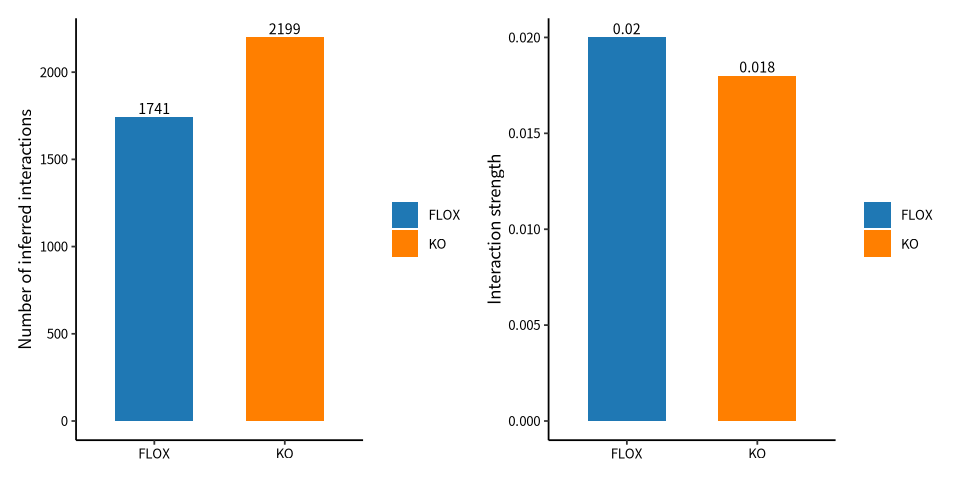

In [ ]:
options(repr.plot.width = 8, repr.plot.height = 4)
p1 <- compareInteractions(cellchat,
                    measure ="count",
                    color.use = c("#1f78b4","#ff7f00"),
                    show.legend = T,
                    group = c("FLOX","KO")
                    )
p2 <- compareInteractions(cellchat,
                    measure ="weight",
                    color.use = c("#1f78b4","#ff7f00"),
                    show.legend = T,
                    group = c("FLOX","KO")
                    )
p1|p2


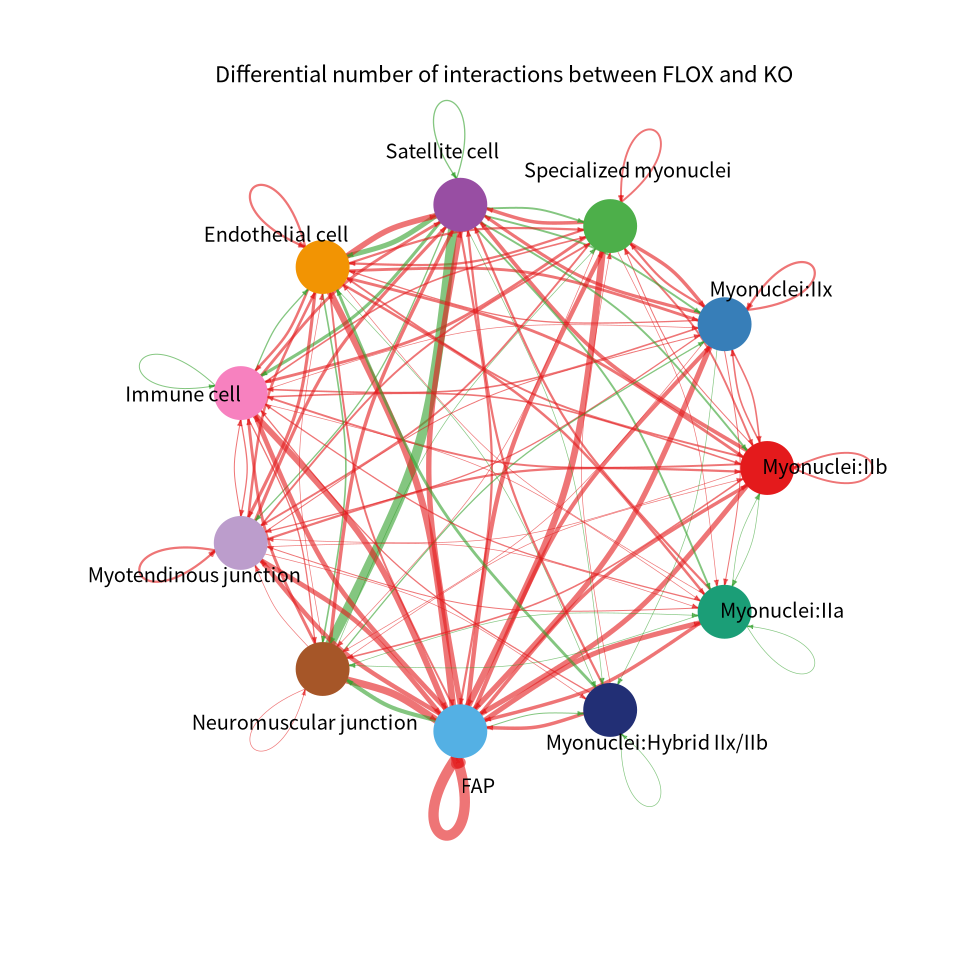

In [ ]:
par(mfrow = c(1, 1), xpd = TRUE)
options(repr.plot.width = 8, repr.plot.height = 8)
p1 <- netVisual_diffInteraction(cellchat,
                          comparison=c("FLOX","KO"),
                          measure = "count",
                          color.edge=c("#e31a1c","#33a02c"),
                          weight.scale = T, 
                          title.name='Differential number of interactions between FLOX and KO'
                          )

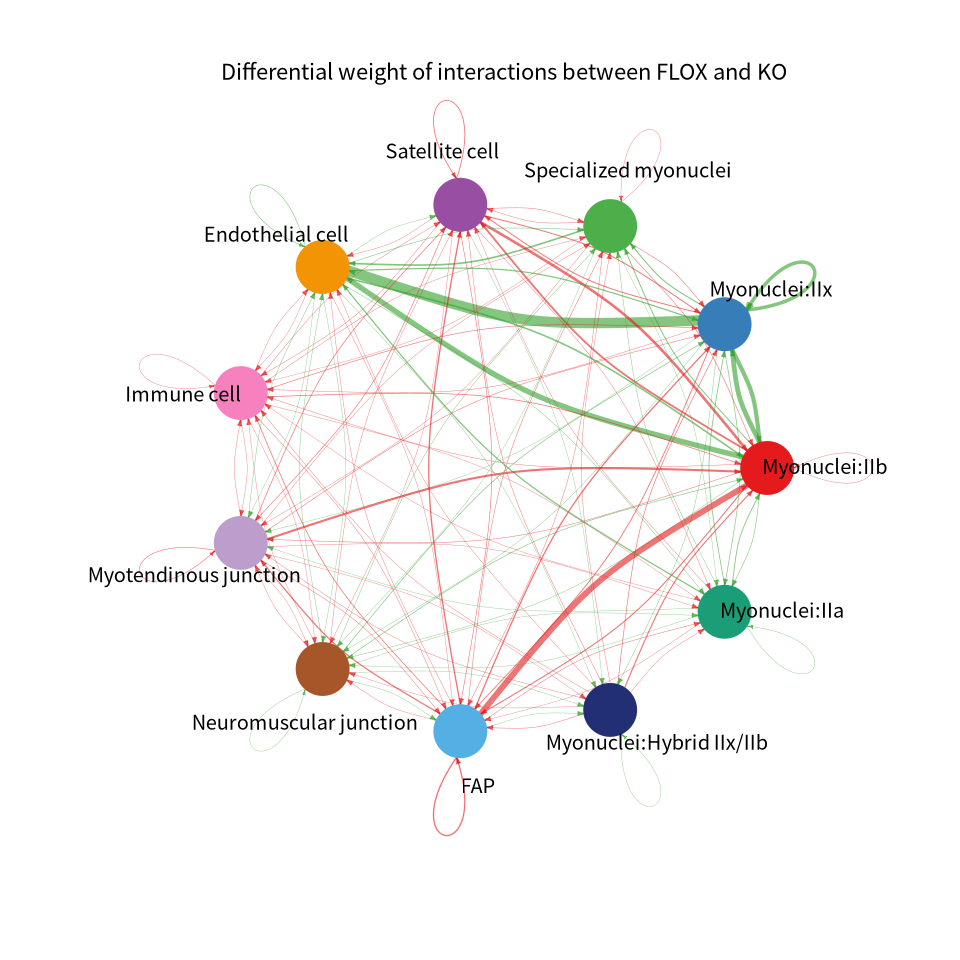

In [ ]:
par(mfrow = c(1, 1), xpd = TRUE)
p2 <- netVisual_diffInteraction(cellchat,
                          comparison=c("FLOX","KO"),
                          measure = "weight",
                          color.edge=c("#e31a1c","#33a02c"),
                          weight.scale = T, 
                          title.name='Differential weight of interactions between FLOX and KO'
                          )

Do heatmap based on a merged object 


Do heatmap based on a merged object 




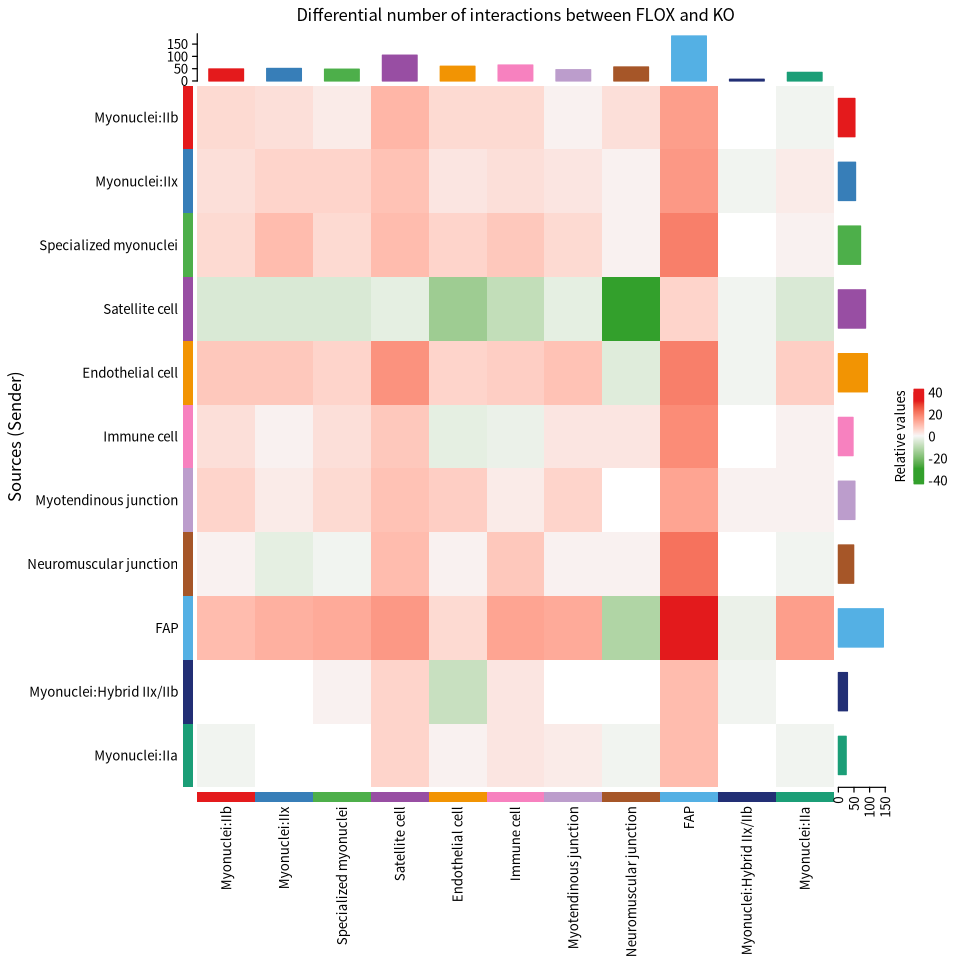

In [ ]:
p1 <- netVisual_heatmap(cellchat,
                        comparison=c("FLOX", "KO"), 
                        measure = "count",  
                        color.heatmap = c("#33a02c", "#e31a1c"),
                        title.name='Differential number of interactions between FLOX and KO'
)

p2 <- netVisual_heatmap(cellchat,
                        comparison=c("FLOX", "KO"),
                        measure = "weight",      
                        color.heatmap = c("#33a02c", "#e31a1c"),
                        title.name='Differential weight of interactions between FLOX and KO'
)
p1

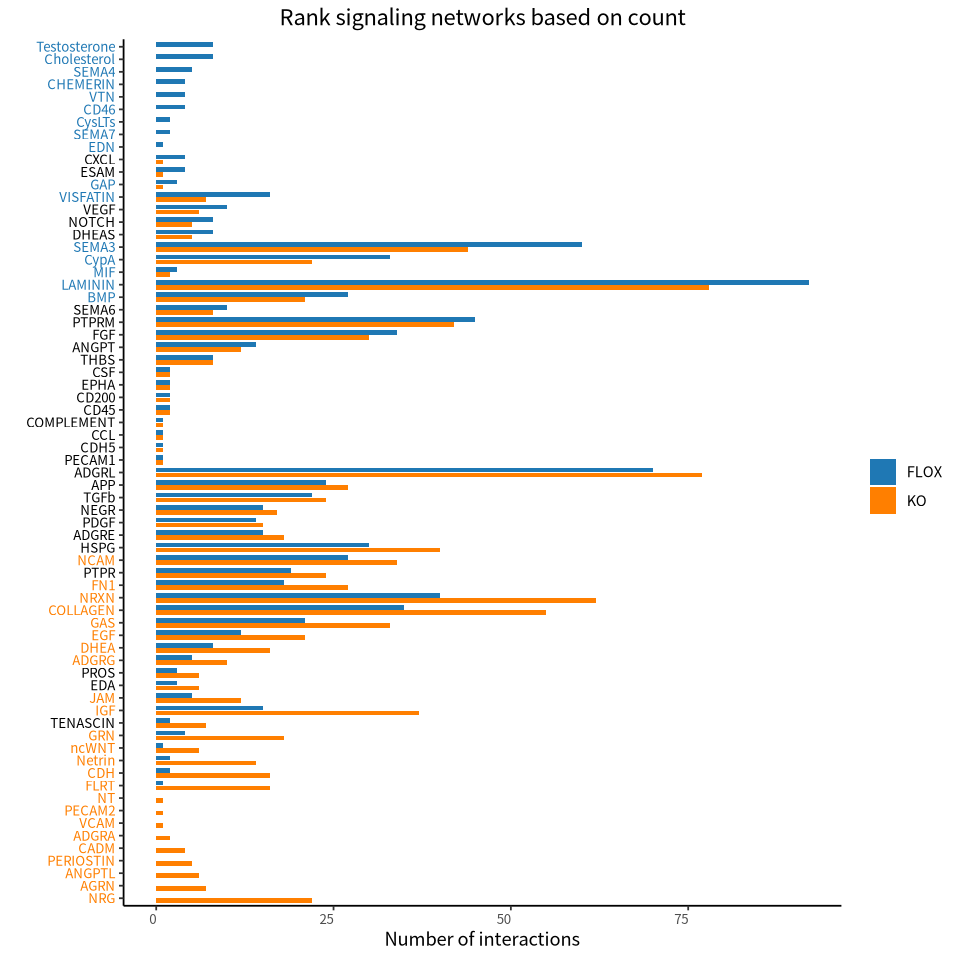

In [ ]:
p1 <- rankNet(cellchat,
        measure = c("count"),
        color.use=c("#1f78b4","#ff7f00"),
        mode = "comparison",
        stacked = T, 
        do.stat = T 
        )

p2 <- rankNet(cellchat,
        measure = c("count"),
        color.use=c("#1f78b4","#ff7f00"),
        mode = "comparison",
        stacked = F,
        do.stat = T,
        title = 'Rank signaling networks based on count'
)
p2

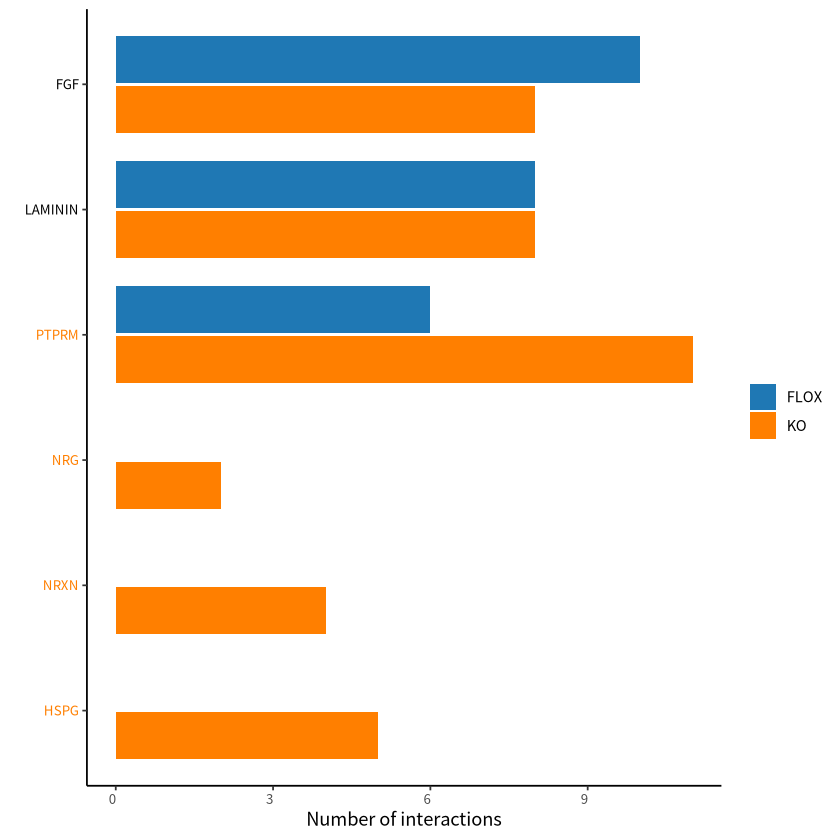

In [15]:
p2

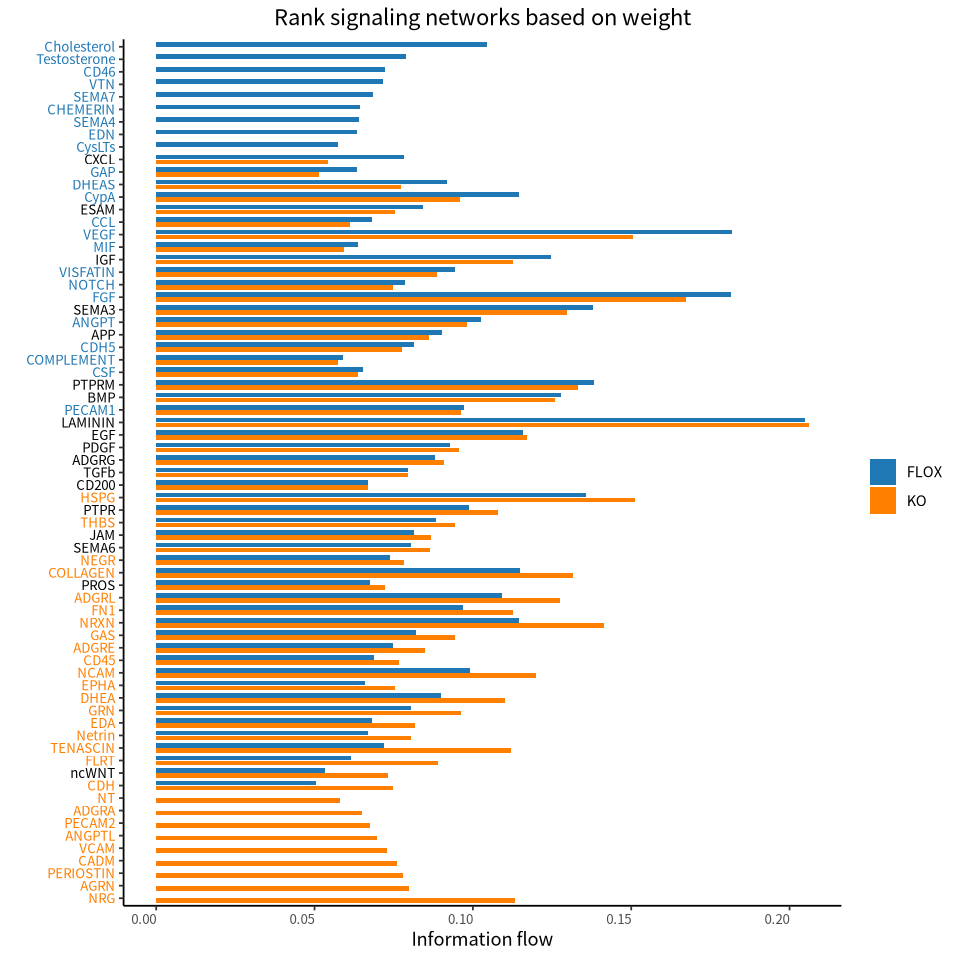

In [ ]:
p1 <- rankNet(cellchat,
        measure = c("weight"),
        color.use=c("#1f78b4","#ff7f00"),
        mode = "comparison",
        stacked = T, 
        do.stat = T 
        )

p2 <- rankNet(cellchat,
        measure = c("weight"),
        color.use=c("#1f78b4","#ff7f00"),
        mode = "comparison",
        stacked = F, 
        do.stat = T,
        title = 'Rank signaling networks based on weight'
)
p2

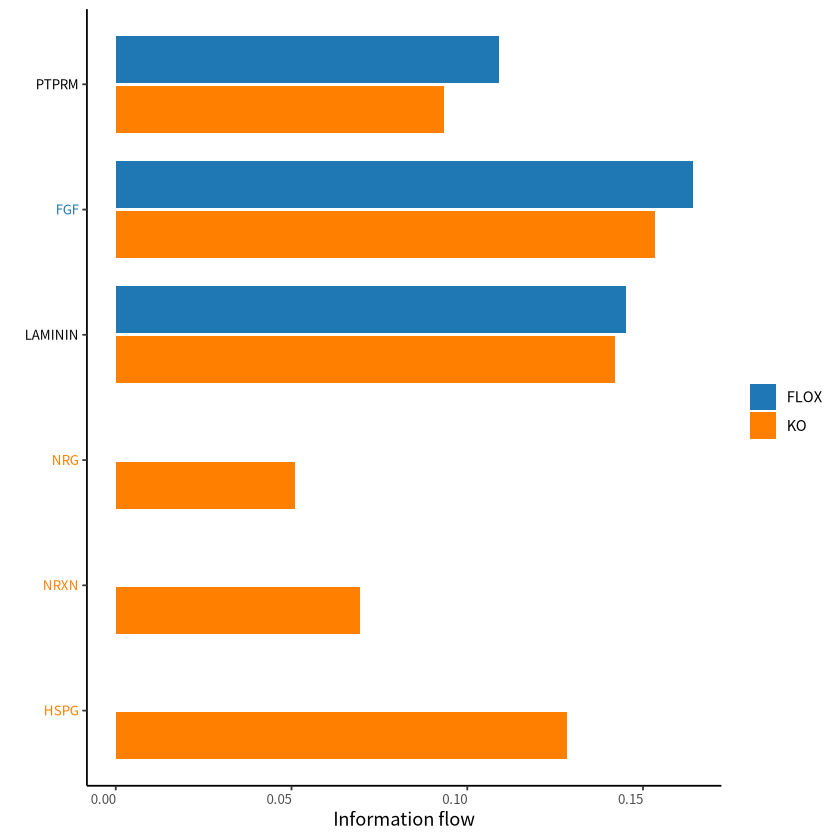

In [17]:
p2

In [41]:
library(ComplexHeatmap)

i = 1
# combining all the identified signaling pathways from different datasets 
pathway.union <- union(cellchat.list[[i]]@netP$pathways, cellchat.list[[i+1]]@netP$pathways)
ht1 = netAnalysis_signalingRole_heatmap(cellchat.list[[i]], pattern = "outgoing", signaling = pathway.union, title = names(cellchat.list)[i], width = 5, height = 18)
ht2 = netAnalysis_signalingRole_heatmap(cellchat.list[[i+1]], pattern = "outgoing", signaling = pathway.union, title = names(cellchat.list)[i+1], width = 5, height = 18)
# draw(ht1 + ht2, ht_gap = unit(0.5, "cm"))

In [48]:
ht1 = netAnalysis_signalingRole_heatmap(cellchat.list[[i]], pattern = "incoming", signaling = pathway.union, title = names(cellchat.list)[i], width = 5, height = 18, color.heatmap = "GnBu")
ht2 = netAnalysis_signalingRole_heatmap(cellchat.list[[i+1]], pattern = "incoming", signaling = pathway.union, title = names(cellchat.list)[i+1], width = 5, height = 18, color.heatmap = "GnBu")

In [51]:
ht1 = netAnalysis_signalingRole_heatmap(cellchat.list[[i]], pattern = "all", signaling = pathway.union, title = names(cellchat.list)[i], width = 5, height = 18, color.heatmap = "OrRd")
ht2 = netAnalysis_signalingRole_heatmap(cellchat.list[[i+1]], pattern = "all", signaling = pathway.union, title = names(cellchat.list)[i+1], width = 5, height = 18, color.heatmap = "OrRd")

In [141]:
cellchat@meta$datasets = factor(cellchat@meta$datasets, levels = c("FLOX", "KO")) # set factor level
p1 <- plotGeneExpression(cellchat, signaling = c("PTPRM","FGF","LAMININ","NRG","NRXN","HSPG"), split.by = "datasets", colors.ggplot = T)

There is no significant communication of NRG

There is no significant communication of NRXN

There is no significant communication of HSPG

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which wi

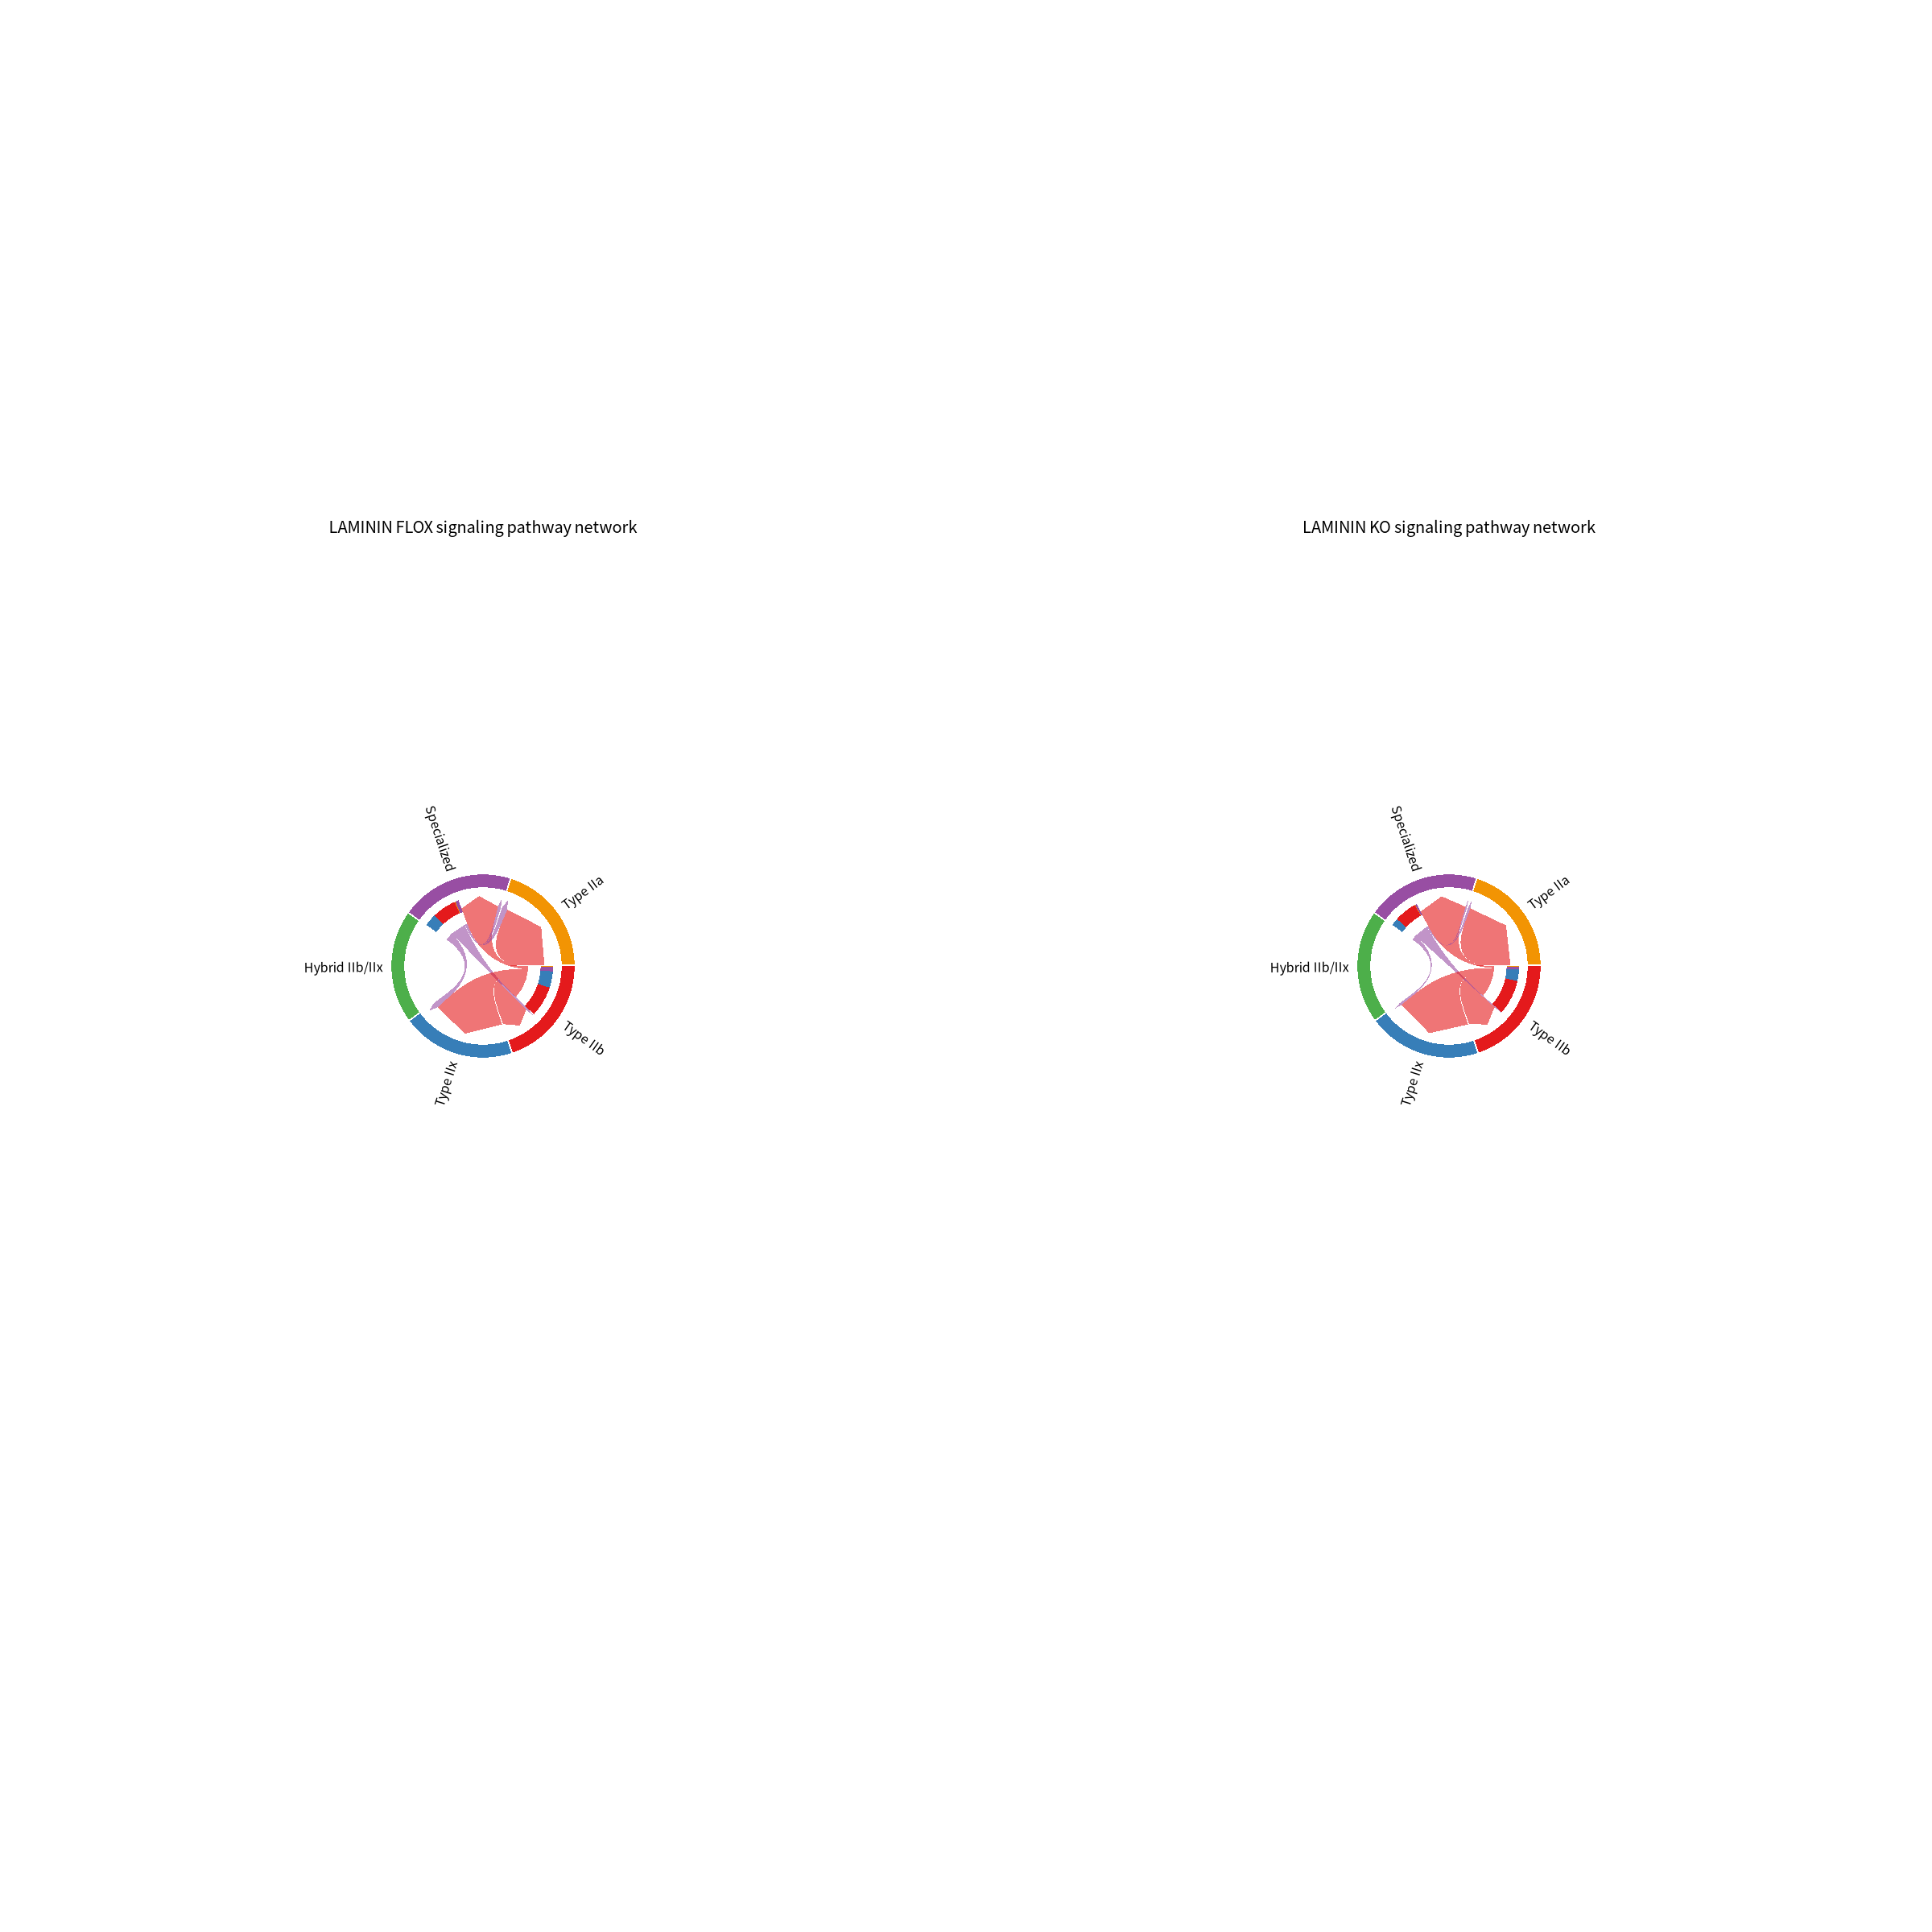

In [150]:
# Chord diagram
options(repr.plot.width = 20, repr.plot.height = 20)

pathways.show <- c("LAMININ") 
par(mfrow = c(1,2), xpd=TRUE)
for (i in 1:length(cellchat.list)) {
  netVisual_aggregate(cellchat.list[[i]], signaling = pathways.show, layout = "chord", signaling.name = paste(pathways.show, names(cellchat.list)[i]))
}

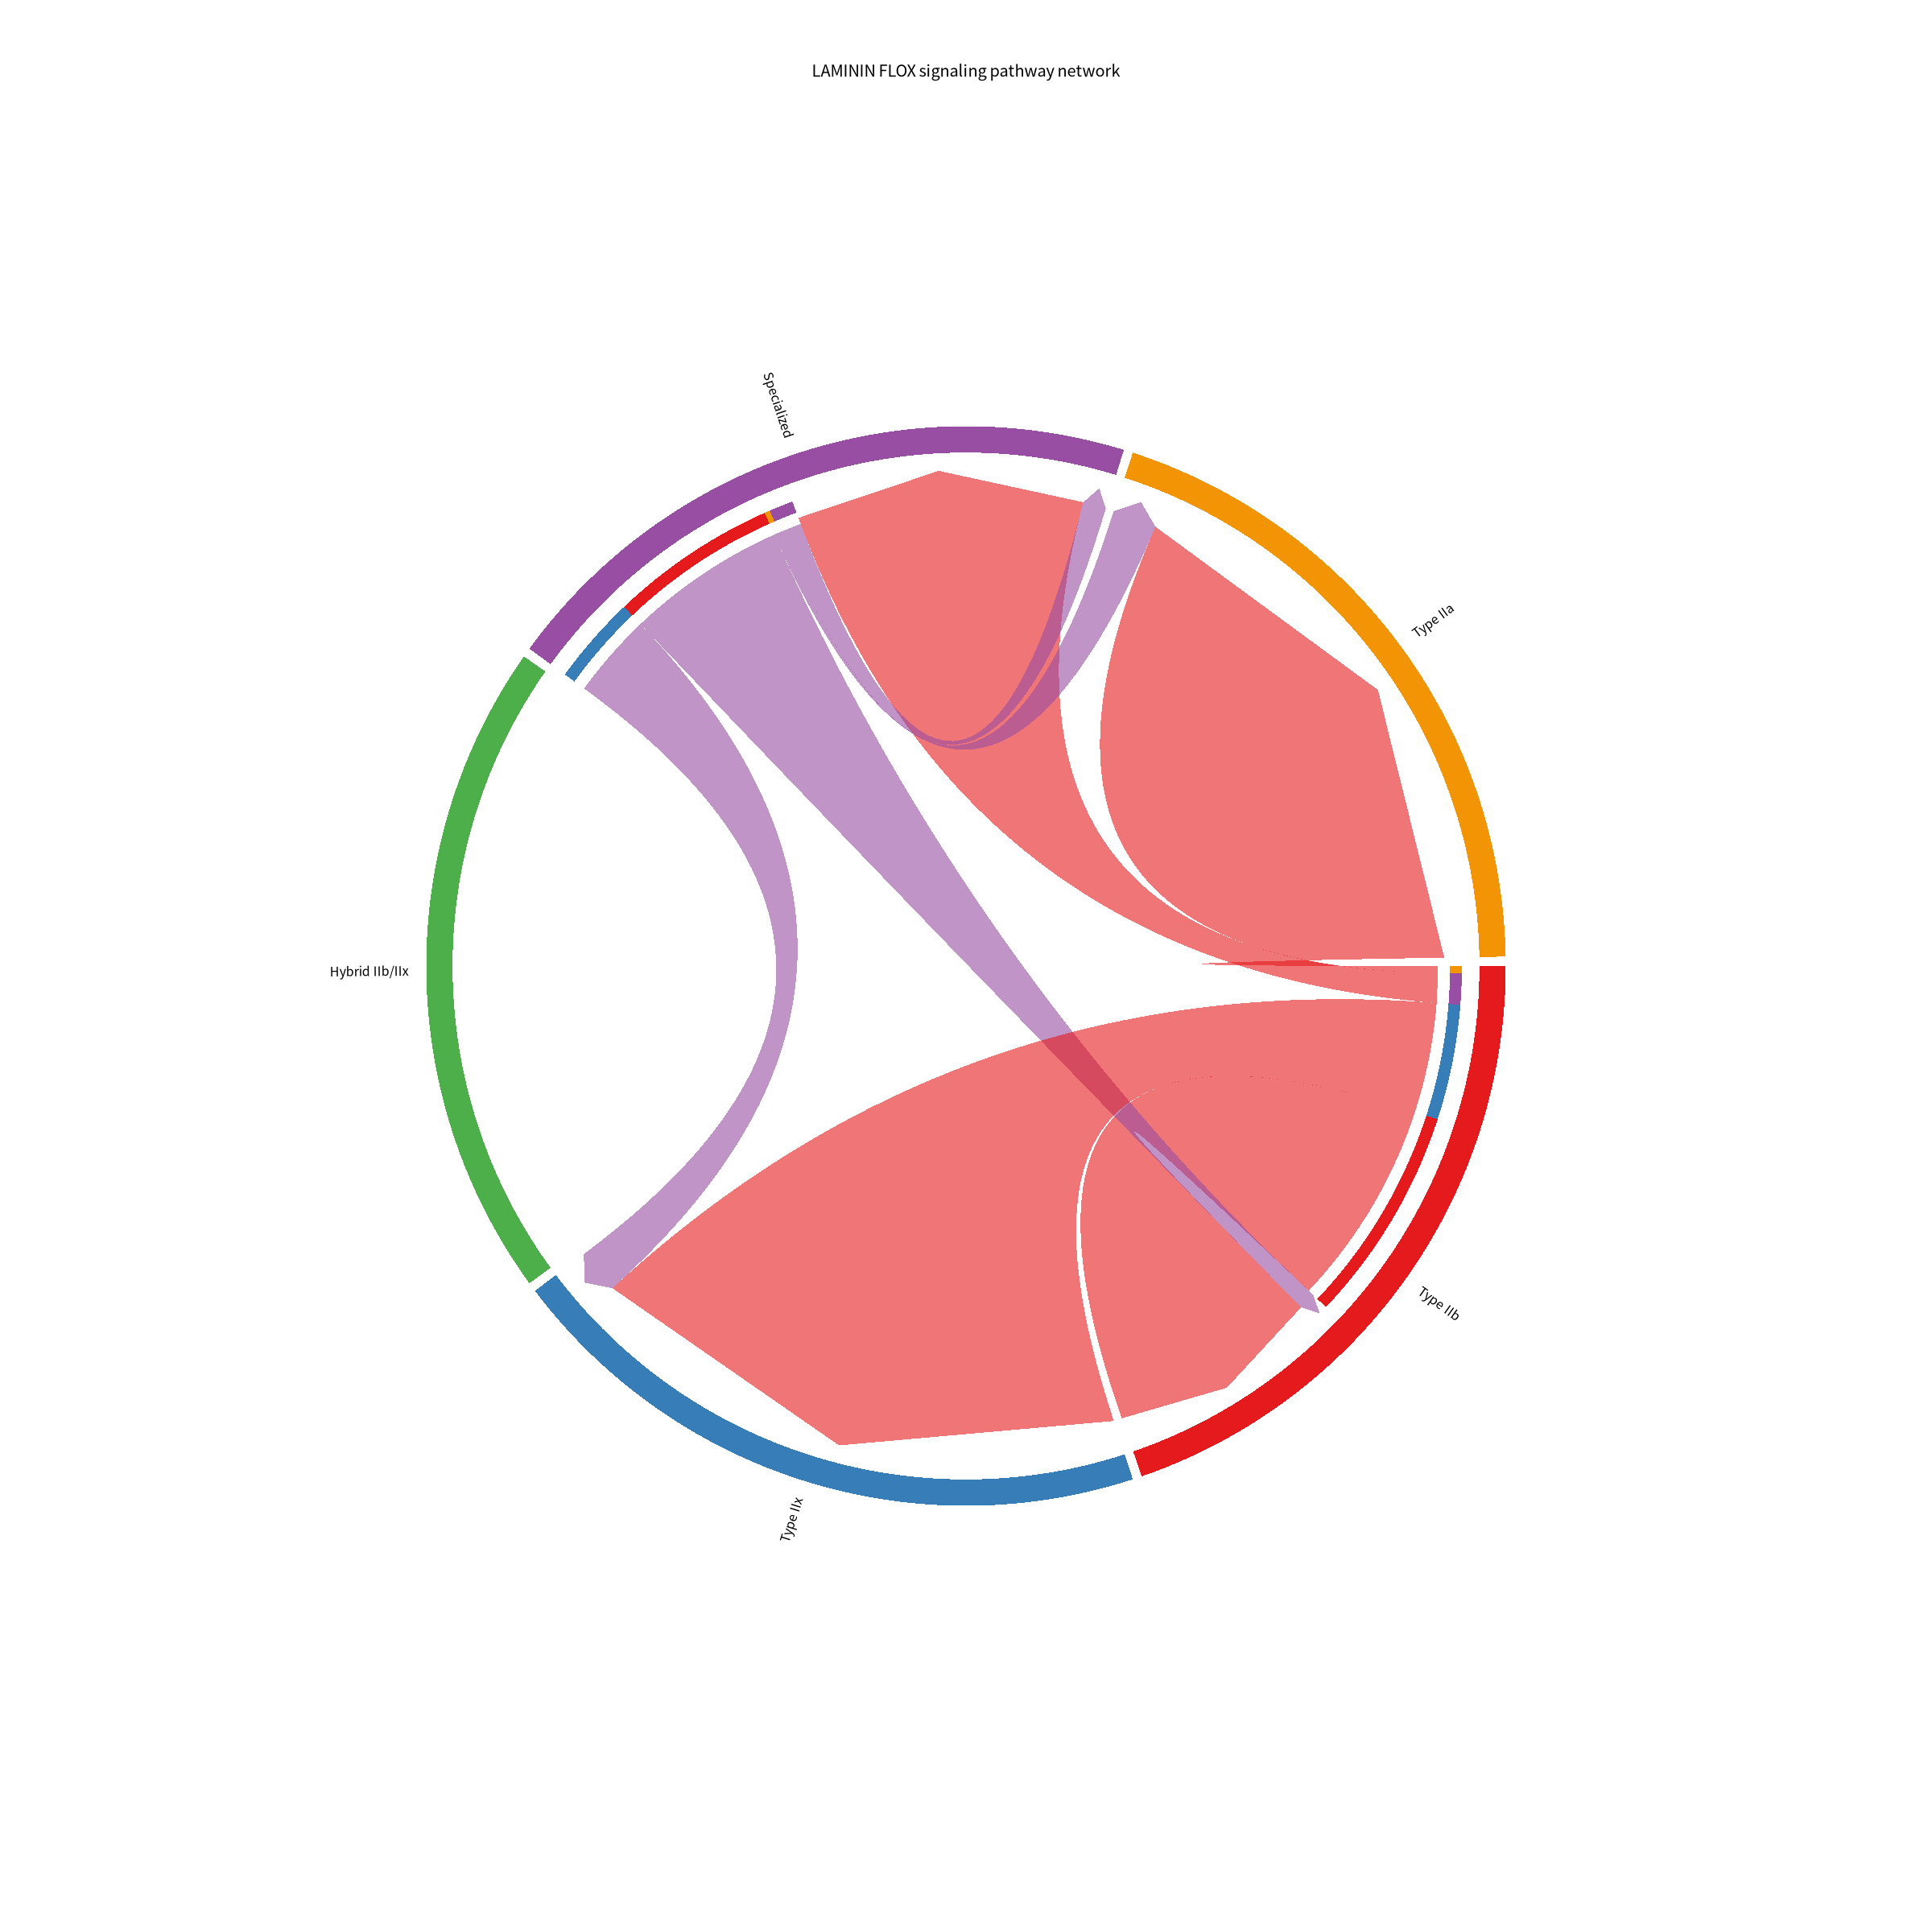

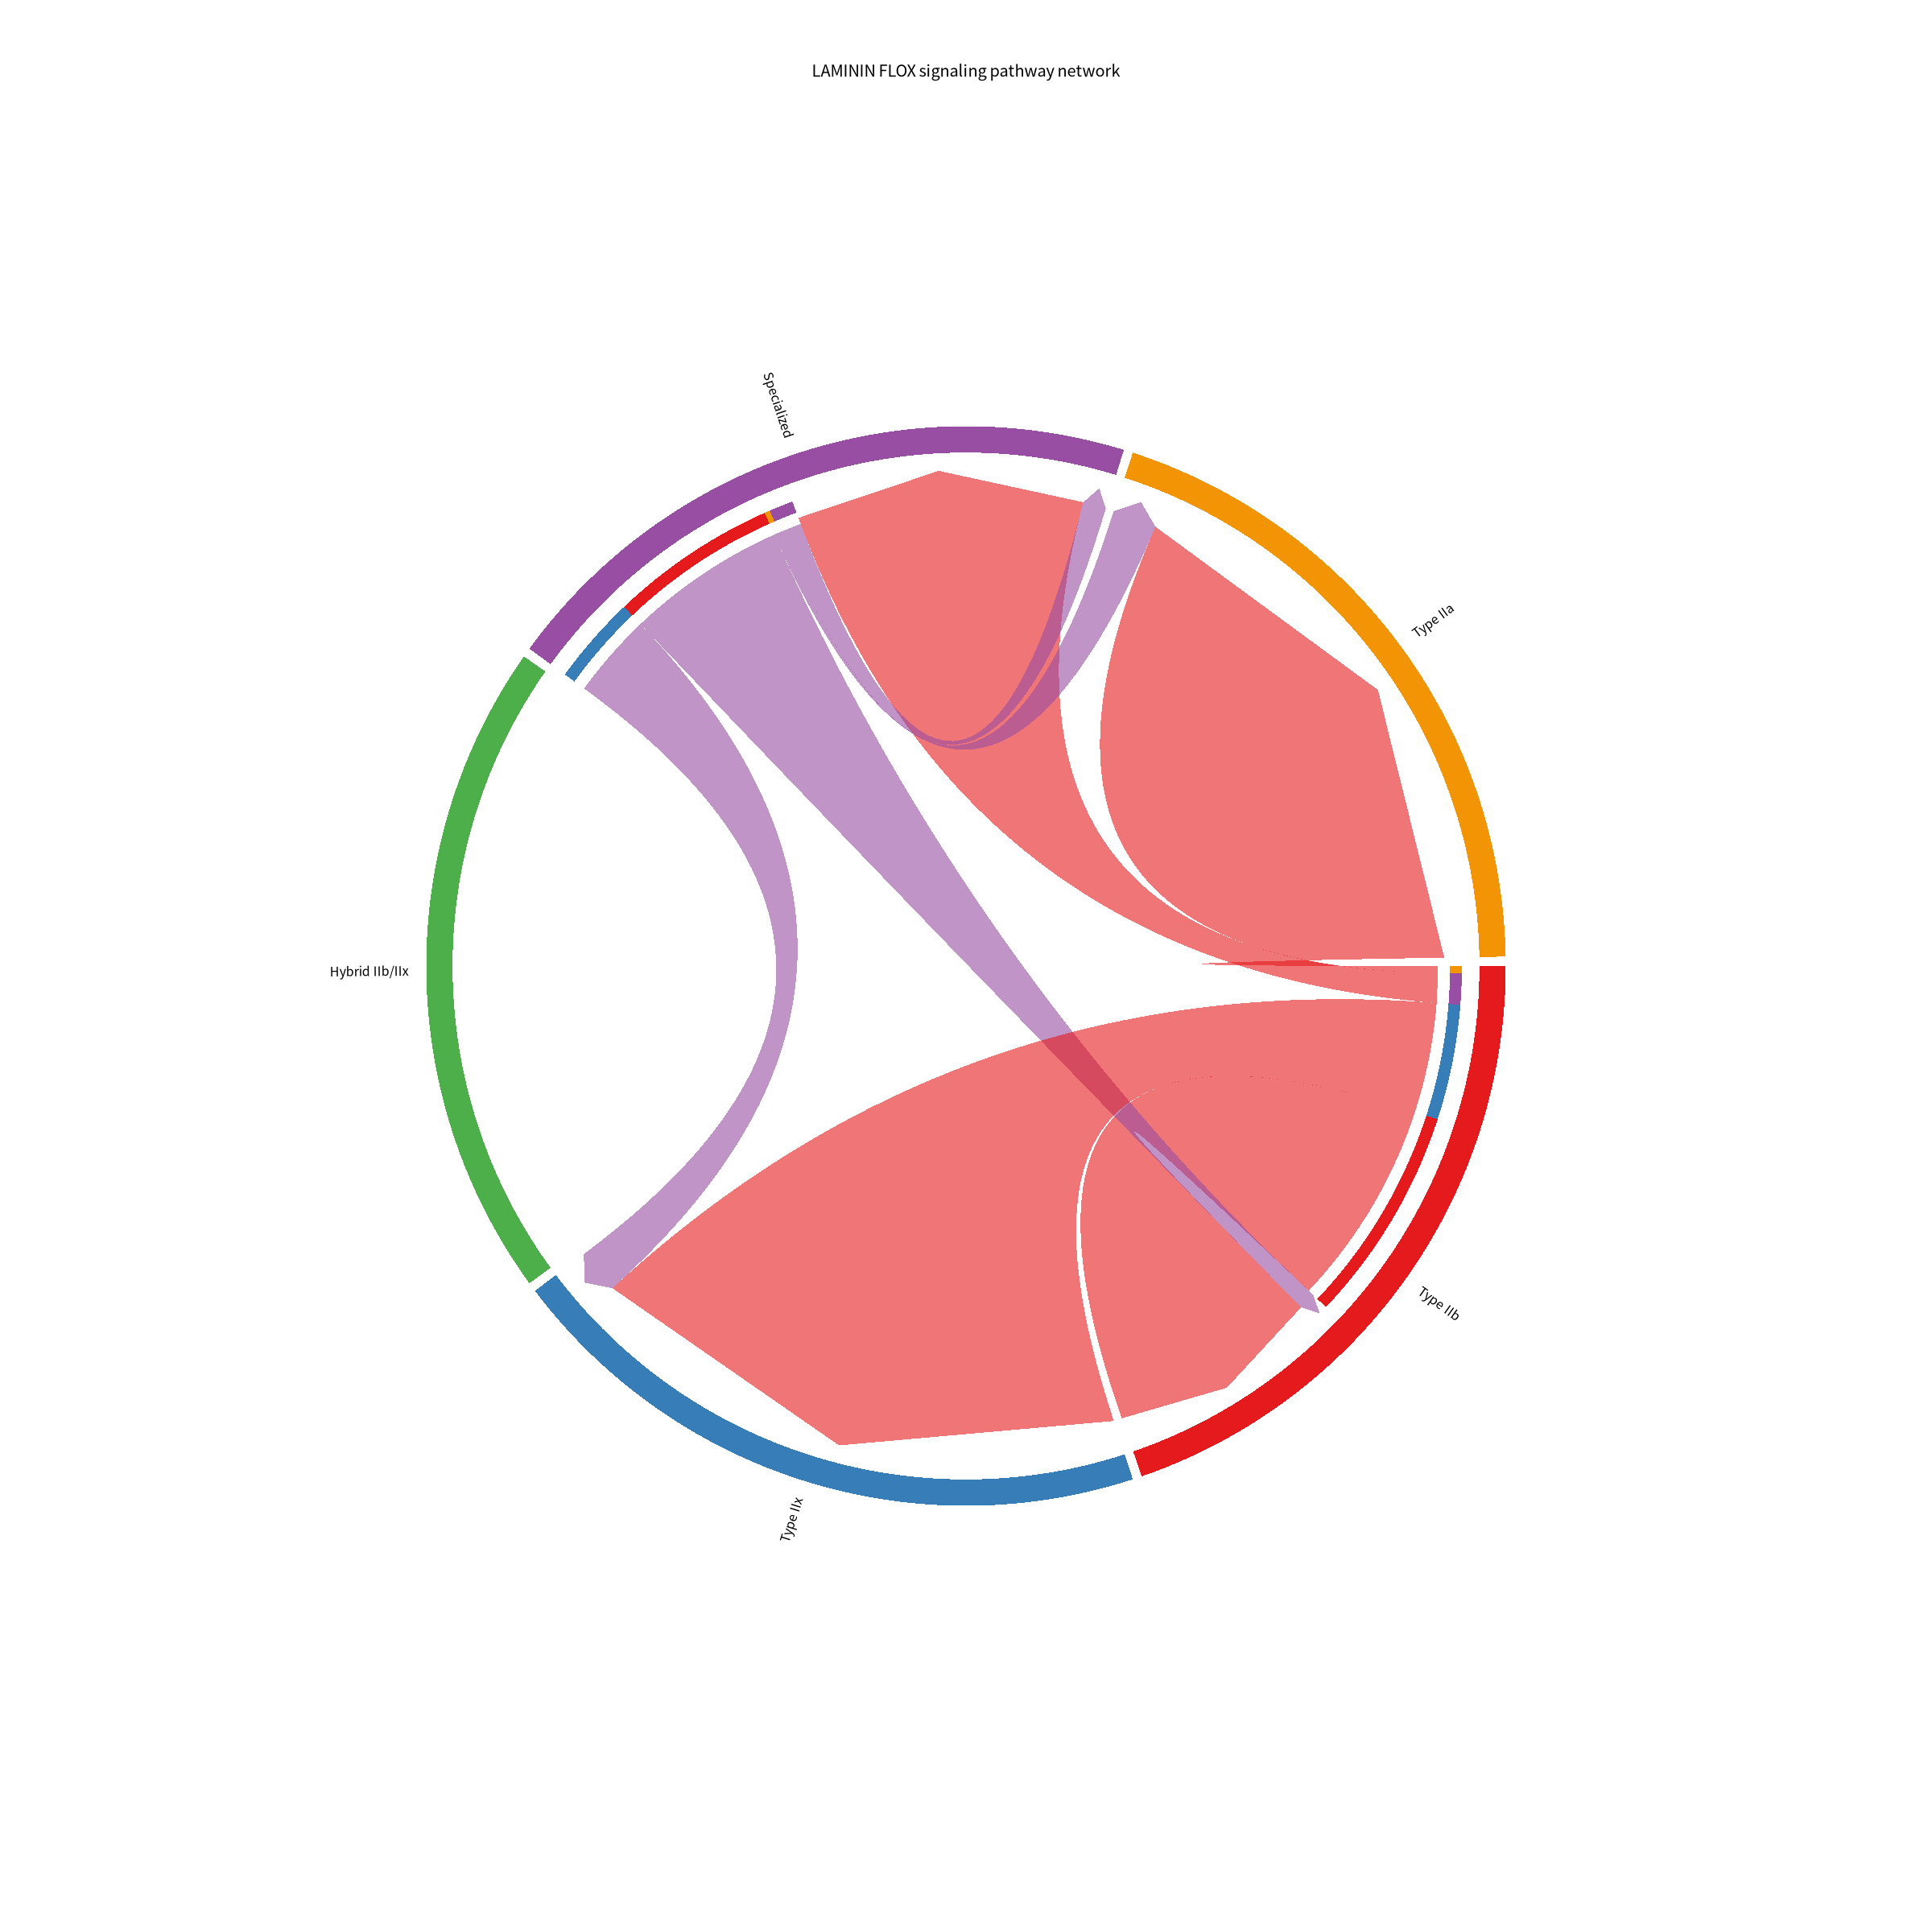

In [151]:
netVisual_aggregate(cellchat.list[[1]], signaling = pathways.show, layout = "chord", signaling.name = paste(pathways.show, names(cellchat.list)[1]))

[1] "Myonuclei:IIb"            "Myonuclei:IIx"           
 [3] "Specialized myonuclei"    "Satellite cell"          
 [5] "Endothelial cell"         "Immune cell"             
 [7] "Myotendinous junction"    "Neuromuscular junction"  
 [9] "FAP"                      "Myonuclei:Hybrid IIx/IIb"
[11] "Myonuclei:IIa"

Comparing communications on a merged object 




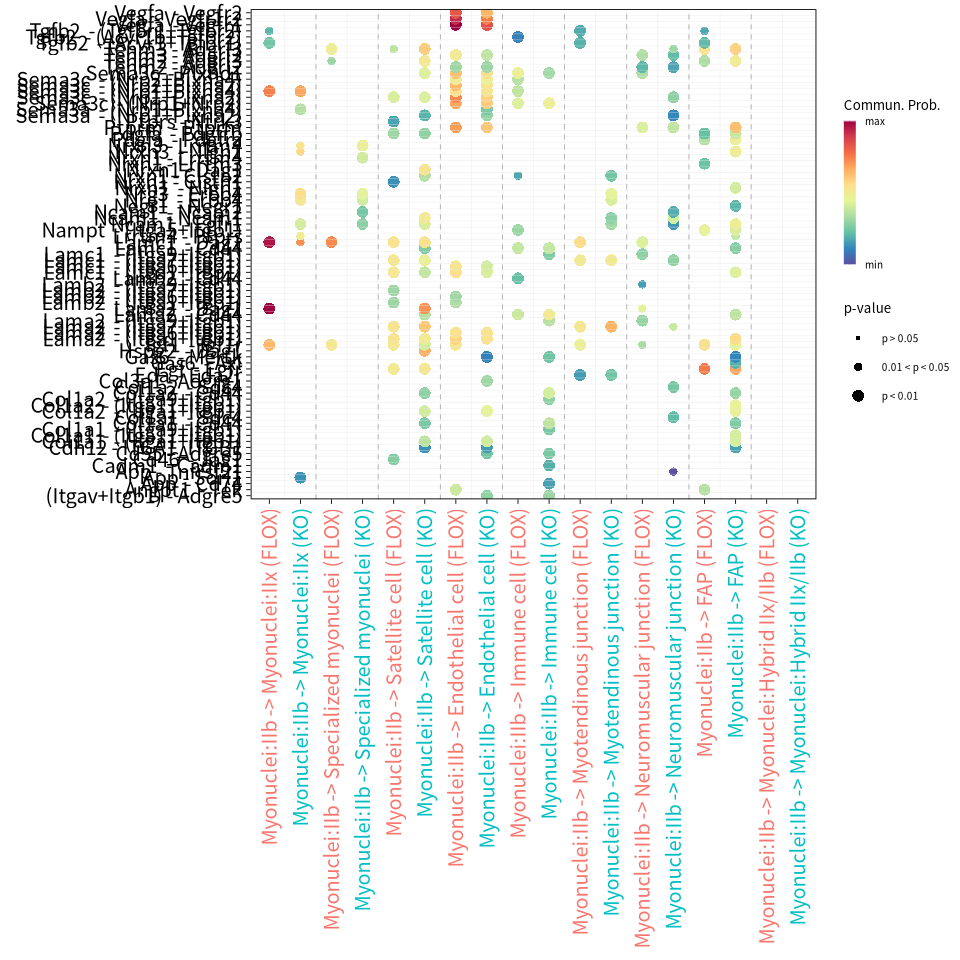

In [ ]:
levels(cellchat@idents$joint)
p1 <- netVisual_bubble(cellchat, 
                 sources.use = c(1),
                 targets.use = c(2:10), 
                 comparison = c(1,2), 
                 font.size = 15,
                 font.size.title = 15,
                 angle.x = 90)
p1